In [26]:
from gurobipy import *
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Variables
```
Model.addVar(lb = 0.0,              # lower bound
             ub = float('inf'),     # upper bound
             obj = 0.0,             # objective coefficient
             vtype = GRB.CONTINUOUS,# variable type
             name = "")              # name
```

In [2]:
opt_mod = Model(name = 'linear program')

x = opt_mod.addVar(name = 'x', vtype = GRB.CONTINUOUS, lb = 0)
y = opt_mod.addVar(name = 'y', vtype = GRB.CONTINUOUS, lb = 0)

Academic license - for non-commercial use only - expires 2021-07-18
Using license file C:\Users\eaut2\gurobi.lic


In [3]:
obj_fn = 5*x + 4*y
opt_mod.setObjective(obj_fn, GRB.MINIMIZE) # GRB.MAXIMIZE

In [4]:
c1 = opt_mod.addConstr( x   +   y >= 8, name = 'c1')
c2 = opt_mod.addConstr( 2*x +   y >= 10, name = 'c2')
c3 = opt_mod.addConstr(   x + 4*y >= 11, name = 'c3')

In [5]:
opt_mod.optimize()
opt_mod.write("linear_model.lp")

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6c7cdc94
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [4e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+01]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.850000e+01   0.000000e+00      0s
       2    3.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  3.400000000e+01


In [6]:
print('Objective Funktion Value: %f'% opt_mod.objVal)
for v in opt_mod.getVars():
    print('%s: %g' %(v.varName,v.x))

Objective Funktion Value: 34.000000
x: 2
y: 6


### LP Vorlesung 1.

<code> 
Maximize
    30 x1 + 25 x2
subject to
      x1 +   x2 <= 10
    5 x1 + 2 x2 <= 30
             x2 <=  9
      x1        <=  6
end </code>

In [7]:
opt_mod = Model(name = 'linear program')

x1 = opt_mod.addVar(name = 'x1', vtype = GRB.CONTINUOUS, lb = 0)
x2 = opt_mod.addVar(name = 'x2', vtype = GRB.CONTINUOUS, lb = 0)
obj_fn = 30*x1 + 25*x2
opt_mod.setObjective(obj_fn, GRB.MAXIMIZE) # GRB.MAXIMIZE

c1 = opt_mod.addConstr(   x1   +   x2 <= 10, name = 'c1')
c2 = opt_mod.addConstr( 5*x1   + 2*x2 <= 30, name = 'c2')
c3 = opt_mod.addConstr(            x2 <= 9, name = 'c3')
c4 = opt_mod.addConstr(   x1          <= 6, name = 'c4')

In [8]:
opt_mod.optimize()
opt_mod.write("linear_model.lp")
print('Objective Funktion Value: %f'% opt_mod.objVal)
for v in opt_mod.getVars():
    print('%s: %g' %(v.varName,v.x))
c1.getAttr

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x21352f07
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [3e+01, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 3e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+02   6.500000e+00   0.000000e+00      0s
       2    2.6666667e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  2.666666667e+02
Objective Funktion Value: 266.666667
x1: 3.33333
x2: 6.66667


<bound method Constr.getAttr of <gurobi.Constr c1>>

In [10]:
# help(opt_mod)
np.ones(9)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

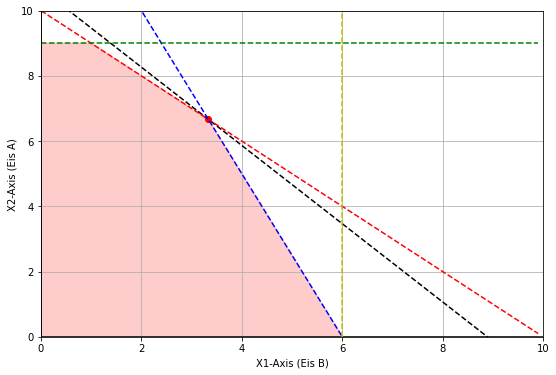

266.6666666666667

In [21]:
x_1 = np.arange(0,10,0.1)

b = 30*x1.X + 25*x2.X
z = (b - 30*x_1) / 25
a1 = 10 - x_1
a2 = (30 - 5 * x_1 ) / 2
a3 = np.array([9.0 for i in range(0,len(x_1))])

a4 = np.minimum(np.minimum(a1,a2),a3)

plt.figure(figsize=(9,6))
plt.plot(x1.X,x2.X,marker="o", color = 'r')
plt.plot(x_1, z, 'k--')
       
plt.plot(x_1, a1, 'r--')
plt.plot(x_1, a2,'b--')
plt.plot(x_1, [9 for i in range(0,len(x_1))],'g--')
plt.plot([6 for i in range(0,15)],range(0,15),'y--')

plt.fill_between(x_1,a4,color='r',alpha=0.2)

plt.hlines(y=0, xmin=0, xmax=10,colors='k', linestyles='solid', label='' )
plt.vlines(x=0, ymin=0, ymax=15,colors='k')

plt.xlim([0, 10])
plt.ylim([0, 10])

plt.grid(True)
plt.xlabel("X1-Axis (Eis B)")
plt.ylabel("X2-Axis (Eis A)")

plt.show()


In [ ]:
obj_fn = 30*x1 + 25*x2
opt_mod.setObjective(obj_fn, GRB.MAXIMIZE) # GRB.MAXIMIZE

c1 = opt_mod.addConstr(   x1   +   x2 <= 10, name = 'c1')
c2 = opt_mod.addConstr( 5*x1   + 2*x2 <= 30, name = 'c2')
c3 = opt_mod.addConstr(            x2 <= 9, name = 'c3')
c4 = opt_mod.addConstr(   x1          <= 6, name = 'c4')